## Deep Learning with Python, Tensorflow, and Keras tutorial, Aug 2018

https://www.youtube.com/watch?v=wQ8BIBpya2k

In [1]:
# !pip3 insta;; --upgrade tensorflow

In [2]:
import tensorflow as tf
tf.__version__ # get the version of tensorflow on the computer

'2.6.3'

In [4]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0 to 9

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer flattended from 28x28 to 784z1 (or 1x28^2)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 2nd layer with 128 nodes
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd layer with 128 nodes
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # output layer with number of categories, 10

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2641 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1072 - accuracy: 0.9668: 0s - loss: 0.107
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9767


In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.9704
0.09408080577850342 0.9703999757766724


In [14]:
model.save('epic_num_reader.model') # save the model with an arbitrary name

2022-05-02 17:01:26.310441: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [15]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test]) # test the model on the test set
print(predictions)

[[3.8342183e-08 1.4983744e-08 2.6353755e-06 ... 9.9992013e-01
  4.4785786e-08 7.1071454e-06]
 [5.1590381e-09 5.0361737e-06 9.9998474e-01 ... 1.1910127e-09
  2.3509017e-08 3.7473143e-11]
 [2.5454051e-07 9.9956757e-01 1.8105466e-05 ... 3.8712609e-05
  1.6495569e-04 1.0800801e-06]
 ...
 [5.6791671e-10 5.9129000e-08 2.7572733e-09 ... 1.3701239e-06
  4.8410953e-07 7.7368750e-05]
 [5.3618010e-07 2.0881166e-06 2.1170395e-07 ... 1.4398917e-06
  1.7332330e-03 4.5868192e-06]
 [2.4807522e-07 2.4899164e-08 1.6556118e-07 ... 2.8856264e-09
  3.3278423e-07 9.6692952e-07]]


In [17]:
# apply the model to the, say, first element in the test set ...
import numpy as np
print(np.argmax(predictions[0]))

7


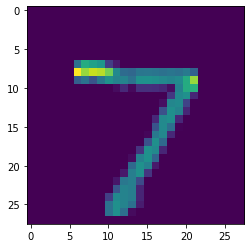

In [20]:
# ... and check the actual value of te first element:
plt.imshow(x_test[0])
plt.show()

In [8]:
import matplotlib.pyplot as plt
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18